In [1]:
import os
seed = 10
os.environ['PYTHONHASHSEED']=str(seed)

In [2]:
import requests
import lxml
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.utils import compute_class_weight
import tensorflow as tf
from pil import Image
from sklearn import preprocessing
import tensorflow_addons as tfa

count = 0

In [3]:
seed = 10
df = pd.read_csv("data/cyclic_tickers/initial_indicators/ANF_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,21.5000,24.211693,-82.142857,-6805500.0,2.0
2000-01-24,20.2500,23.602201,-92.465753,-8986800.0,1.0
2000-01-25,20.1875,23.076863,-92.307692,-11383100.0,2.0
2000-01-26,20.8750,22.738115,-82.786885,-9392500.0,2.0
2000-01-27,22.8750,22.759174,-56.557377,-6811000.0,2.0


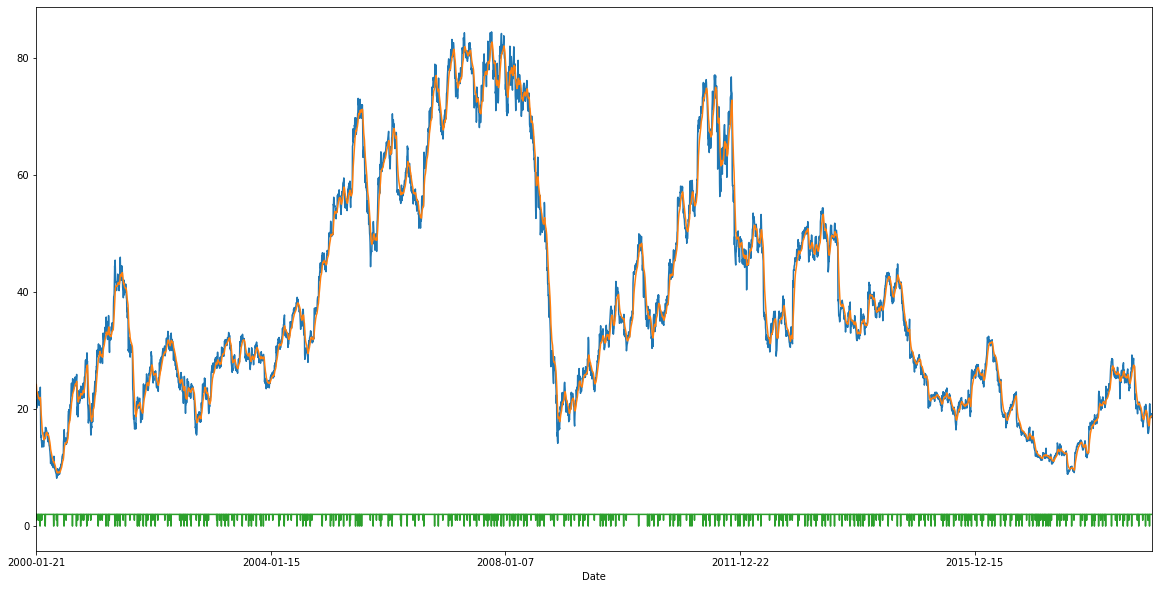

In [4]:
#%matplotlib notebook
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

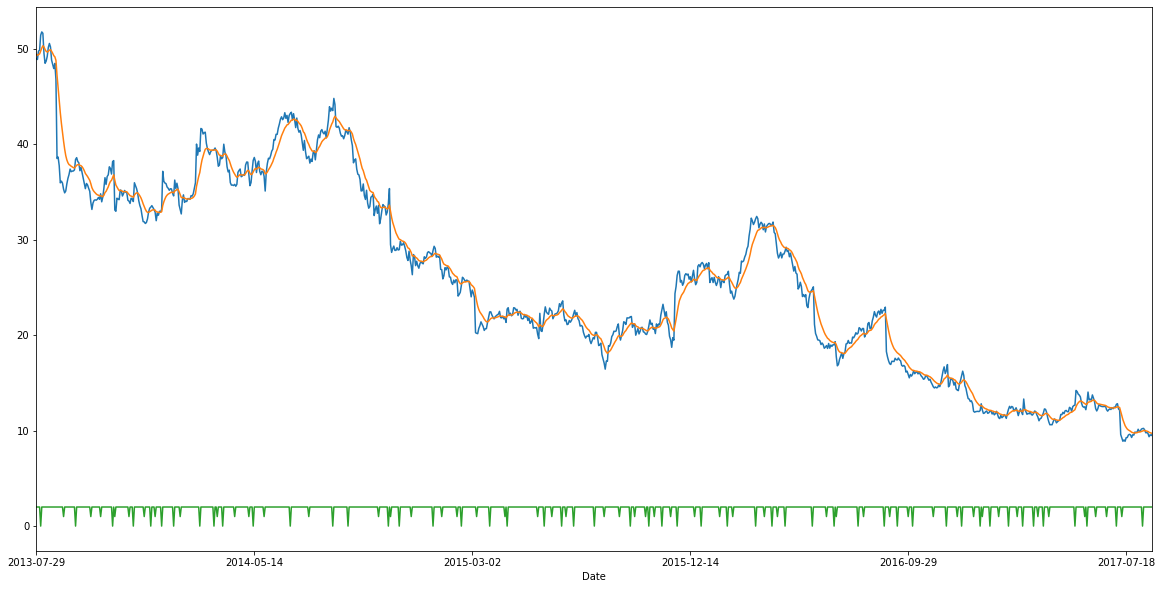

In [5]:
df = df.loc['2013-07-29':'2017-08-21']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [6]:
df.to_csv('bear phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [7]:
acc_df = df
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1025 entries, 2013-07-29 to 2017-08-21
Data columns (total 5 columns):
previous_1d    1025 non-null float64
EMA_12         1025 non-null float64
willr_14       1025 non-null float64
OBV_7          1025 non-null float64
labels         1025 non-null float64
dtypes: float64(5)
memory usage: 48.0+ KB


In [12]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/JPM_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,49.375000,48.388499,-42.592593,-2894250.0,2.0
2000-01-24,48.625000,48.424884,-39.516144,-8054850.0,2.0
2000-01-25,48.666668,48.462081,-38.709668,-1595700.0,2.0
2000-01-26,49.750000,48.660222,-17.741956,5984250.0,2.0
2000-01-27,52.291668,49.218906,-5.232557,14370900.0,2.0


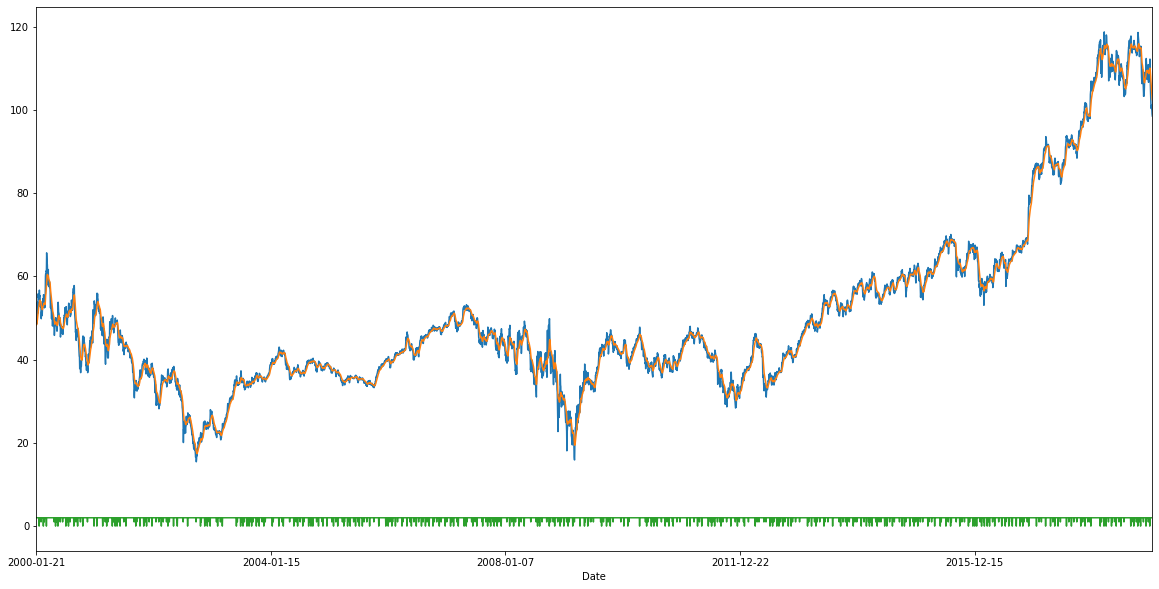

In [13]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

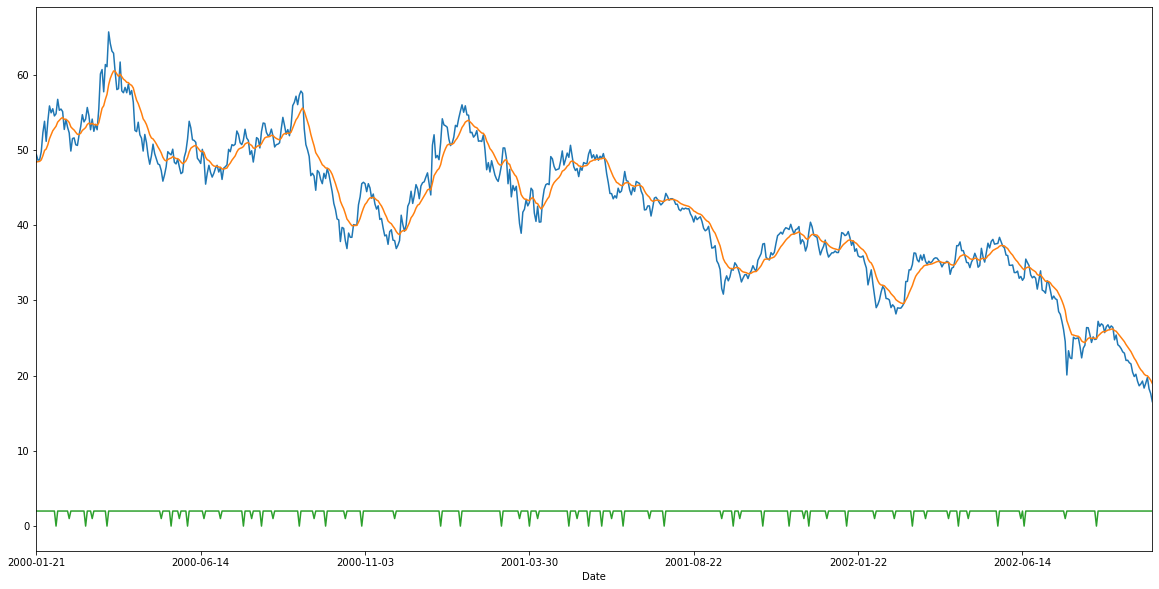

In [14]:
df = df.loc[:'2002-10-07']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [15]:
df.to_csv('bear phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [16]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1705 entries, 2013-07-29 to 2002-10-07
Data columns (total 5 columns):
previous_1d    1705 non-null float64
EMA_12         1705 non-null float64
willr_14       1705 non-null float64
OBV_7          1705 non-null float64
labels         1705 non-null float64
dtypes: float64(5)
memory usage: 79.9+ KB


In [17]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/F_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,28.696527,28.933312,-60.897434,-10551829.0,2.0
2000-01-24,27.717651,28.746288,-97.435894,-19556923.0,2.0
2000-01-25,28.095465,28.646161,-83.333274,-11634726.0,2.0
2000-01-26,27.545919,28.476893,-83.505131,-18162314.0,1.0
2000-01-27,26.378138,28.154008,-91.269808,-32689253.0,2.0


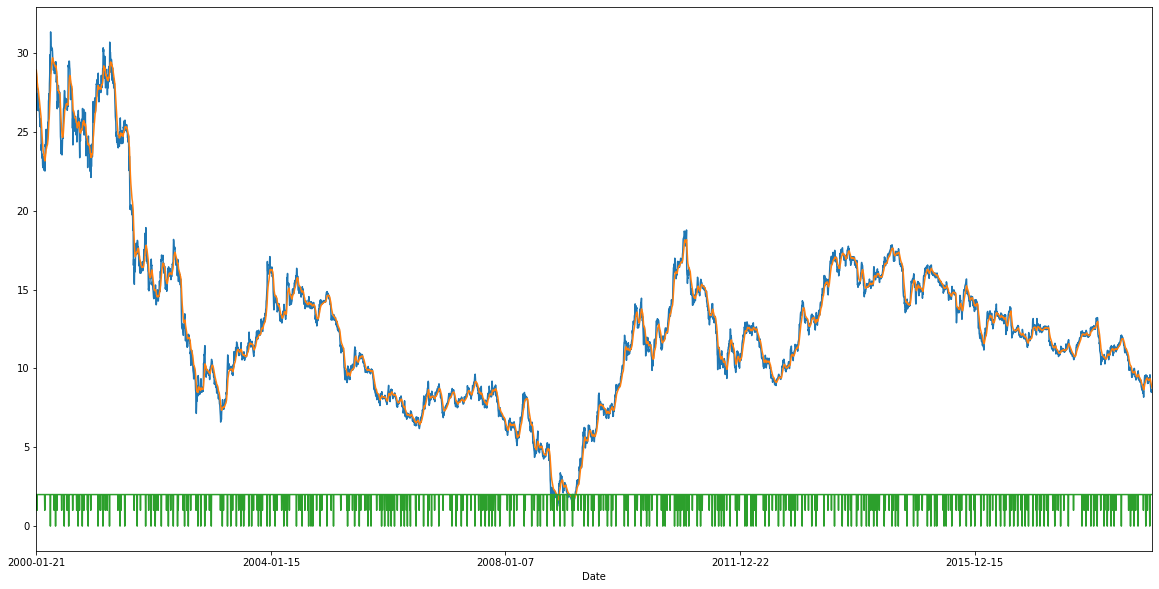

In [18]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

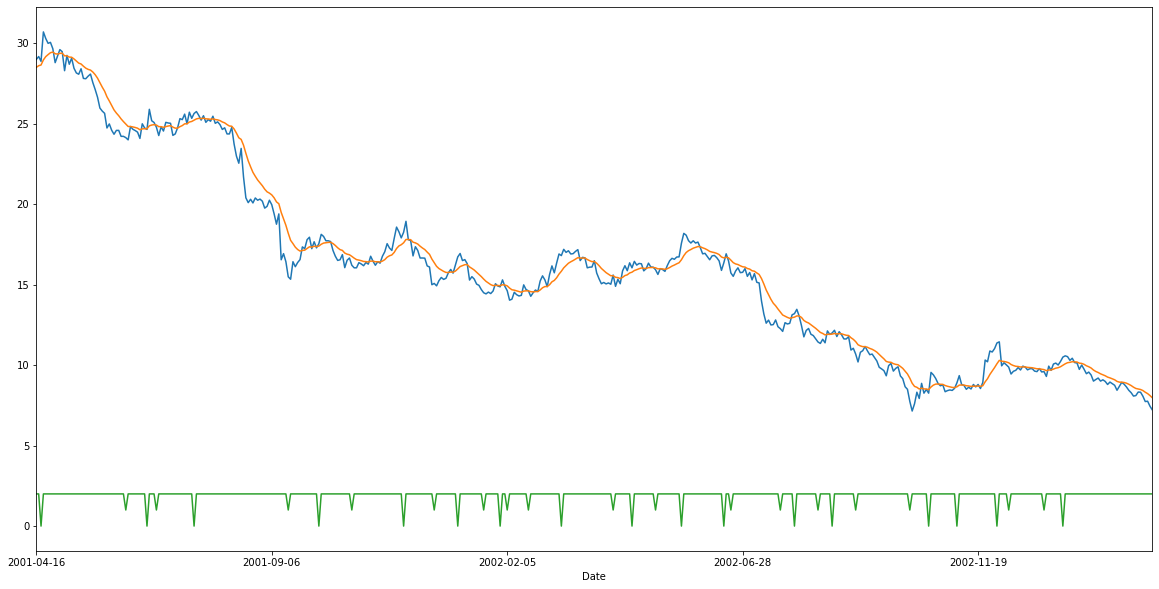

In [19]:
df = df.loc['2001-04-16':'2003-03-10']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [20]:
df.to_csv('bear phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [21]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2180 entries, 2013-07-29 to 2003-03-10
Data columns (total 5 columns):
previous_1d    2180 non-null float64
EMA_12         2180 non-null float64
willr_14       2180 non-null float64
OBV_7          2180 non-null float64
labels         2180 non-null float64
dtypes: float64(5)
memory usage: 102.2+ KB


In [28]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/GM_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2010-12-09,34.450001,34.250232,-52.739722,581566100.0,2.0
2010-12-10,33.740002,34.171735,-64.921359,563163900.0,2.0
2010-12-13,33.810001,34.116083,-61.256454,574905600.0,2.0
2010-12-14,33.799999,34.067455,-61.780126,563876300.0,2.0
2010-12-15,33.889999,34.040154,-57.068075,579041900.0,1.0


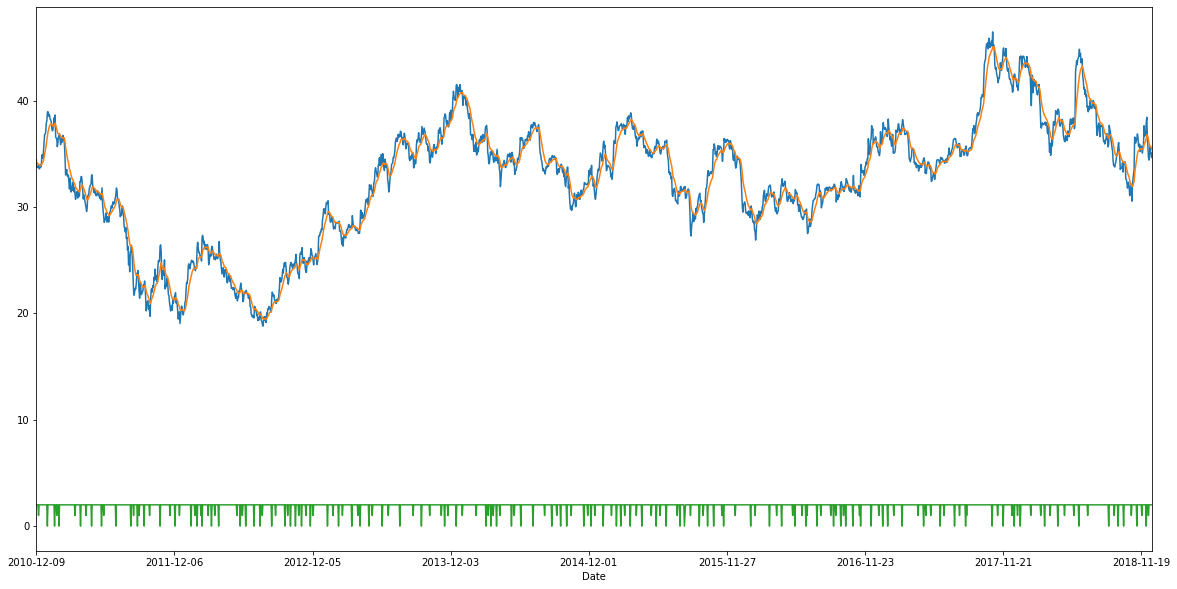

In [29]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

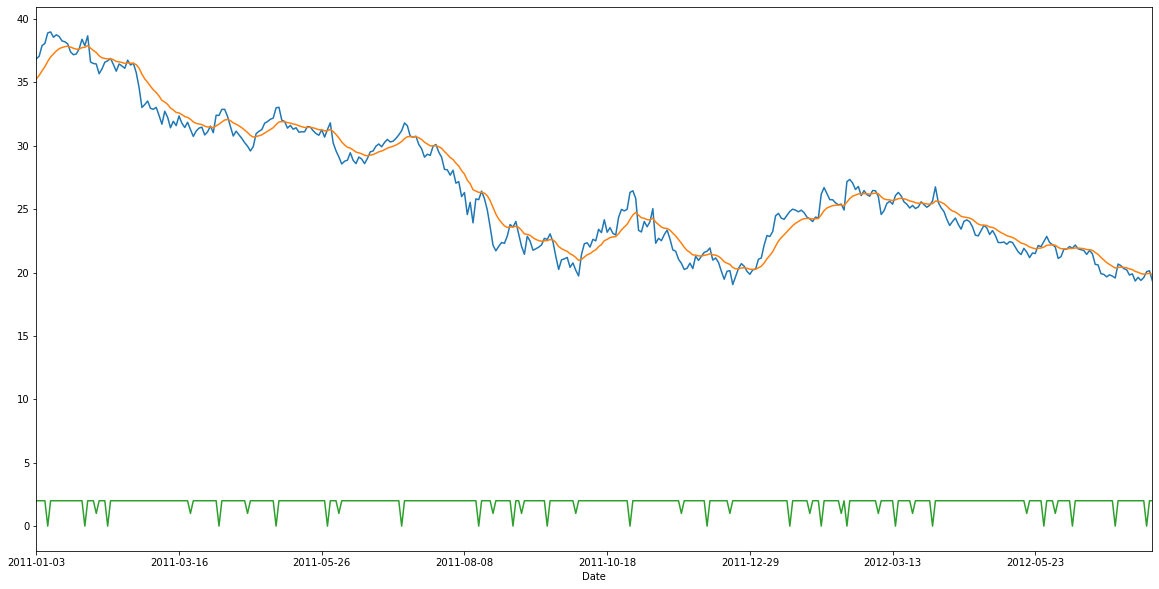

In [30]:
df = df.loc['2011-01-03':'2012-07-23']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [31]:
df.to_csv('bear phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [32]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2572 entries, 2013-07-29 to 2012-07-23
Data columns (total 5 columns):
previous_1d    2572 non-null float64
EMA_12         2572 non-null float64
willr_14       2572 non-null float64
OBV_7          2572 non-null float64
labels         2572 non-null float64
dtypes: float64(5)
memory usage: 120.6+ KB


In [33]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/1398.HK_data_down.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2018-01-22,7.19,6.771425,-1.136336,3.248229e+09,2.0
2018-01-23,7.09,6.820437,-14.666621,2.718594e+09,2.0
2018-01-24,7.33,6.898831,-8.333325,3.443507e+09,2.0
2018-01-25,7.28,6.957472,-13.541628,2.874295e+09,2.0
2018-01-26,7.06,6.973246,-36.458322,2.394853e+09,2.0


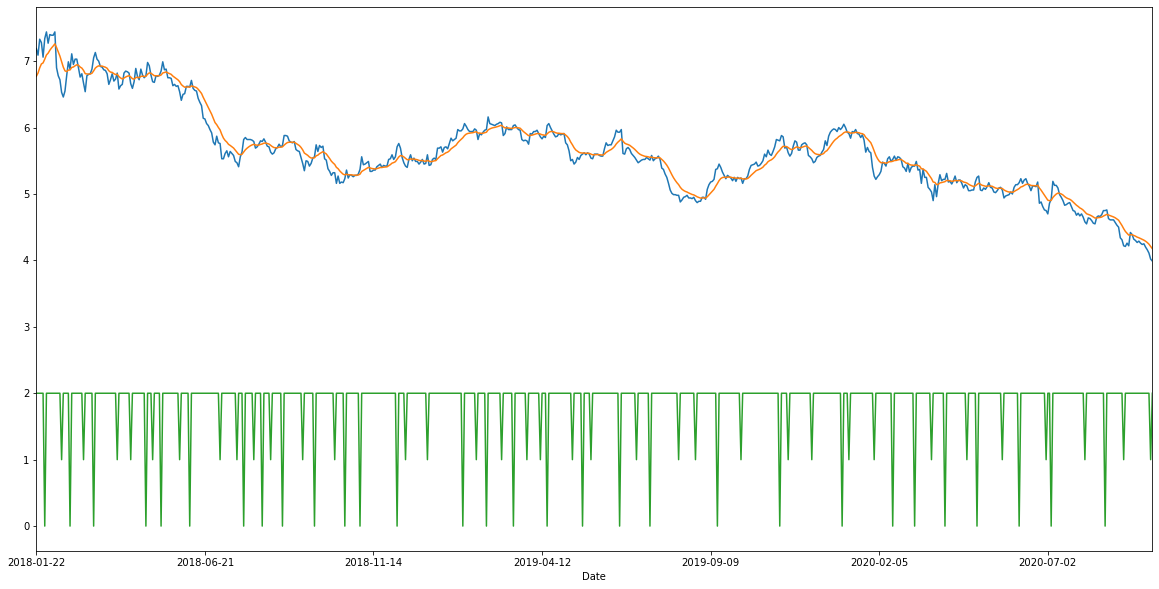

In [34]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [35]:
df.to_csv('bear phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [36]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3235 entries, 2013-07-29 to 2020-09-28
Data columns (total 5 columns):
previous_1d    3235 non-null float64
EMA_12         3235 non-null float64
willr_14       3235 non-null float64
OBV_7          3235 non-null float64
labels         3235 non-null float64
dtypes: float64(5)
memory usage: 151.6+ KB


In [39]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/HMC_data_down.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2018-01-23,36.180000,35.813713,-13.991774,-1195100.0,0.0
2018-01-24,36.470001,35.914681,-2.403807,-818600.0,2.0
2018-01-25,36.330002,35.978576,-13.013613,-1233200.0,2.0
2018-01-26,35.900002,35.966488,-54.867110,-1638100.0,2.0
2018-01-29,36.209999,36.003951,-29.245375,-1229100.0,2.0


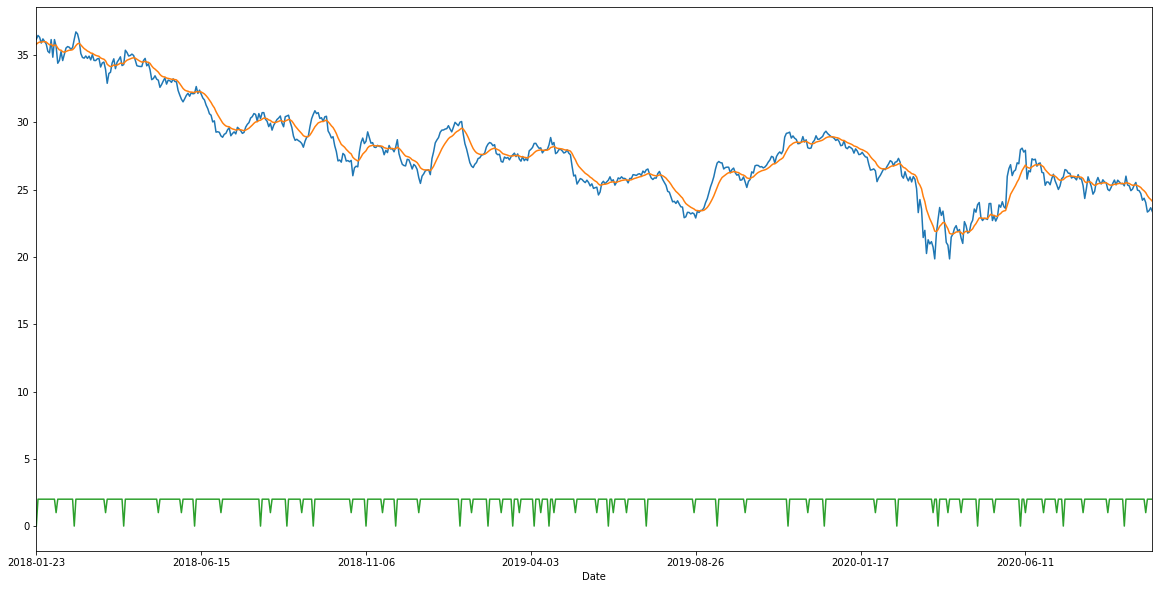

In [40]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [41]:
df.to_csv('bear phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [42]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3913 entries, 2013-07-29 to 2020-09-30
Data columns (total 5 columns):
previous_1d    3913 non-null float64
EMA_12         3913 non-null float64
willr_14       3913 non-null float64
OBV_7          3913 non-null float64
labels         3913 non-null float64
dtypes: float64(5)
memory usage: 183.4+ KB


In [43]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/HMC_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,17.562500,18.182877,-82.786885,-348800.0,2.0
2000-01-24,17.875000,18.135511,-64.957265,-264800.0,2.0
2000-01-25,17.546875,18.044952,-82.905983,-350800.0,2.0
2000-01-26,17.328125,17.934671,-94.871795,-460000.0,2.0
2000-01-27,17.250000,17.829337,-93.548387,-540800.0,2.0


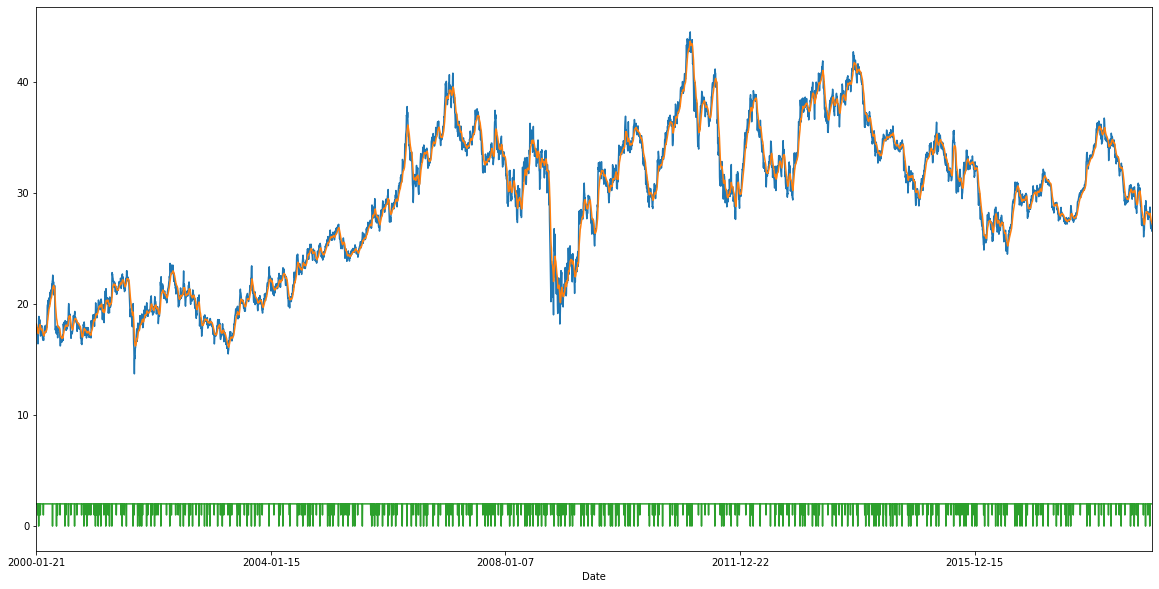

In [44]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

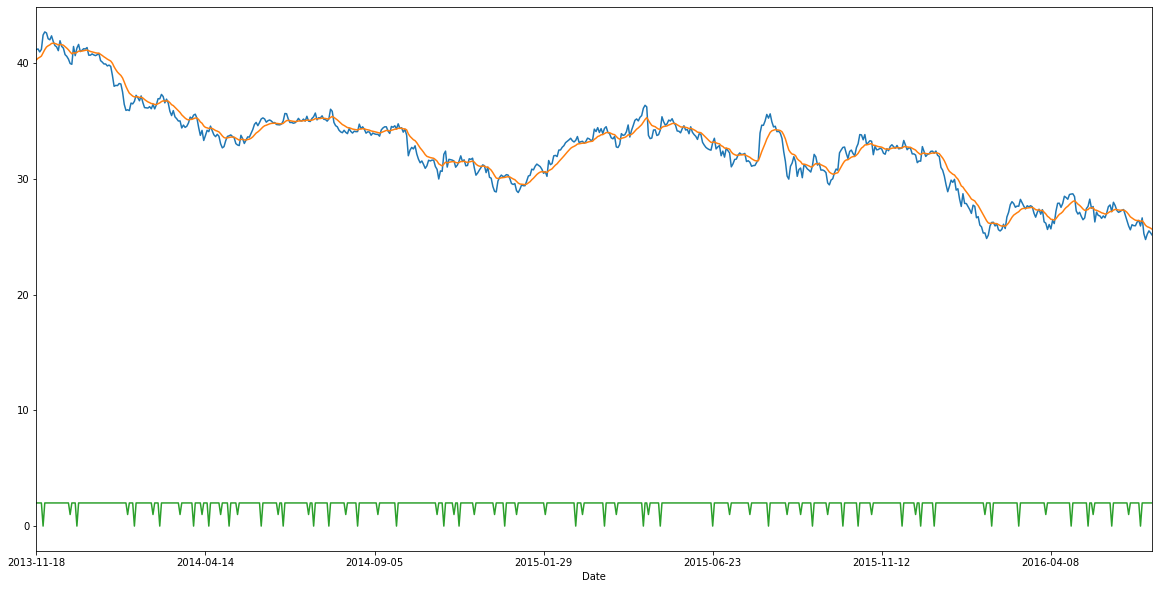

In [45]:
df = df.loc['2013-11-18':'2016-07-05']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [46]:
df.to_csv('bear phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [47]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4574 entries, 2013-07-29 to 2016-07-05
Data columns (total 5 columns):
previous_1d    4574 non-null float64
EMA_12         4574 non-null float64
willr_14       4574 non-null float64
OBV_7          4574 non-null float64
labels         4574 non-null float64
dtypes: float64(5)
memory usage: 214.4+ KB


## Test Set

In [49]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/600104.SS_data_down.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2018-01-22,32.830002,32.653718,-49.494874,128764966.0,2.0
2018-01-23,33.750000,32.822377,-18.518497,165063463.0,2.0
2018-01-24,33.970001,32.998934,-16.190425,201240854.0,2.0
2018-01-25,33.959999,33.146790,-17.627141,173336178.0,2.0
2018-01-26,34.880001,33.413438,-2.648942,221767625.0,0.0


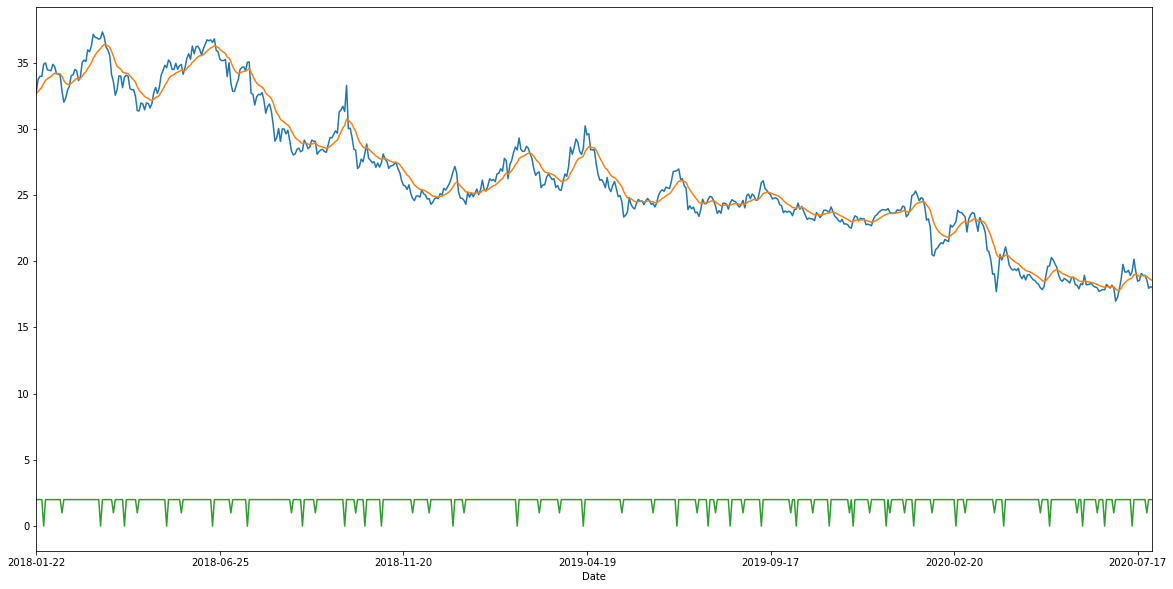

In [50]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [51]:
df.to_csv('bear phase data/test_acc_data.csv')